# Limpieza y visualización de datos Proyecto final - entrega 2
### Alejandro Solano y Juan David Giron 

## 1. Contexto

El conjunto de datos contiene información detallada sobre incidentes delictivos registrados en diversas localidades y barrios de la ciudad de Cali en los 5 primeros meses del año 2020. Este dataset proviene de la secretaria de seguridad, en el que se documentan aspectos clave de cada evento, como la ubicación geográfica (comuna y barrio), la fecha y hora del suceso, el tipo de delito, el sitio específico donde ocurrió, y otros factores como la modalidad del crimen.

Este tipo de datos es sumamente relevante para el análisis de la seguridad ciudadana, ya que permite a las autoridades responsables identificar patrones de criminalidad, comprender la distribución espacial y temporal de los delitos, y tomar decisiones informadas para mejorar la prevención y respuesta ante el crimen. Asimismo, estos datos son valiosos para la investigación académica en criminología y para el desarrollo de modelos predictivos que ayuden a anticipar futuros incidentes en base a patrones históricos.

## 2. Problemática y Valor Generado

El análisis de este conjunto de datos permite generar valor en distintos frentes, tales como: 
-	Las autoridades locales, las cuales pueden tomar decisiones informadas basadas en evidencias para mejorar la seguridad pública.  

-	Diseño de campañas de sensibilización ciudadana efectivas, centradas en las áreas y tipos de delitos que representan un mayor riesgo para la población local.

-	El análisis predictivo basado en estos datos puede ayudar a anticipar posibles incrementos en la criminalidad y permitir una respuesta proactiva, en lugar de reactiva, por parte de la policía.


## 3. Composición de la Base de Datos

El conjunto de datos consta de 8641 registros correspondientes a delitos cometidos, donde incluye 17 columnas que describen diferentes aspectos de cada delito, como la localidad y barrio donde ocurrió, el sitio específico (por ejemplo, vía pública, terminal de transporte), la fecha y hora, el tipo de delito y su dinámica, identificadores de barrios y comunas, así como información sobre la cuantía del delito y el modo de operación.
Las características del conjunto de datos son:

* __LOCALIDAD:__ Indica la comuna o sector administrativo de la ciudad donde ocurrió el hurto.

* __BARRIO:__ Nombre del barrio donde se cometió el hurto.

* __SITIO_DEL:__ Tipo de lugar o sitio específico donde ocurrió el hurto (por ejemplo, vía pública, terminal de transporte).


* __ETAPA_DEL:__ Fase o etapa del proceso legal en el que se encuentra el caso (por ejemplo, indagación).

* __MES_DEL_HE:__ Nombre del mes en que ocurrió el hurto.

* __FECHA_DEL:__ Fecha exacta del hurto en formato año-mes-día.

* __MES:__ Abreviatura del mes en que ocurrió el hurto.

* __DÍA_SEMAN:__ Día de la semana en que ocurrió el hurto.

* __HORA_DEL_H:__ Hora exacta en que ocurrió el hurto.

* __CUANTIA_O:__ Valor del daño o pérdida económica ocasionada por el hurto (esta columna parece estar vacía en algunos registros).

* __USUARIO_DE:__ Código o identificación del usuario que ingresó el registro del hurto.

* __ID_BARRIO:__ Código numérico único que identifica el barrio donde ocurrió el hurto.

* __BARRIO_1:__ Nombre alternativo o estandarizado del barrio donde ocurrió el hurto.

* __COMUNA:__ Número de la comuna donde ocurrió el hurto.

* __ESTRA_MODA:__ Estrato socioeconómico predominante en el área donde ocurrió el hurto.

* __MODO:__ Método o modalidad empleada para cometer el hurto (por ejemplo, estupefacientes).

* __DINÁMICA:__ Descripción del tipo de delito o el modo en que se desarrolló el hurto.

In [1]:
#Cargar librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx

ModuleNotFoundError: No module named 'matplotlib'

In [10]:
#cargar conjunto de datos
df= pd.read_excel("delitos.xlsx")

In [11]:
#Visualizar los 5 primeros registros del dataset
df.head()

,LOCALIDAD,BARRIO,SITIO_DEL,ETAPA_DEL,MES_DEL_HE,FECHA_DEL,MES,DÍA_SEMAN,HORA_DEL_H,CUANTIA_O,USUARIO_DE,ID_BARRIO,BARRIO_1,COMUNA,ESTRA_MODA,MODO,DINÁMICA
0,COMUNA 14,MANUELA BELTRÁN,VIA PUBLICA,EJECUCIÓN DE PENAS,enero,2020-01-01,ene,miércoles,17:45:00,0,PLOZADA,1403,Manuela Beltran,14,1,SIN ARMA,Hurto
1,,,SIN INFORMACION,INDAGACIÓN,enero,2020-01-01,ene,miércoles,08:30:00,0,PONAL_WS,1988,Cañaveralejo - Seguros Patria,19,5,ARMA BLANCA,Hurto
2,COMUNA 15,BAJOS CIUDAD CÓRDOBA,DOMICILIO,INDAGACIÓN,enero,2020-01-01,ene,miércoles,02:00:00,,CPANTOJAS1,1599,El Morichal,15,2,,Hurto
3,COMUNA 7,ALFONSO LÓPEZ III,DOMICILIO,INDAGACIÓN,enero,2020-01-01,ene,miércoles,06:35:00,2.000.000,JVILLARREALM1,703,Alfonso Lopez III,7,3,,Hurto
4,COMUNA 20,PUEBLO JOVEN,VIA PUBLICA,INDAGACIÓN,enero,2020-01-02,ene,jueves,09:30:00,6.000.000,JVILLARREALM1,2008,Pueblo Joven,20,1,ARMA DE FUEGO,Hurto


In [12]:
#crear copia del dataset original
df1= df.copy()

In [13]:
#Cambiar nombre de columnas
df1.columns = [
 'Comuna', 'Barrio', 'Lugar', 'Etapa', 'Mes', 'Fecha', 'Mes_abrev',
    'Dia', 'Hora', 'Cantidad', 'Usuario', 'ID_barrio', 'Barrio1',
    'Comuna1', 'Estrato', 'Modo', 'Dinamica'
]

In [14]:
#Visualizar copia
df1.head()

,Comuna,Barrio,Lugar,Etapa,Mes,Fecha,Mes_abrev,Dia,Hora,Cantidad,Usuario,ID_barrio,Barrio1,Comuna1,Estrato,Modo,Dinamica
0,COMUNA 14,MANUELA BELTRÁN,VIA PUBLICA,EJECUCIÓN DE PENAS,enero,2020-01-01,ene,miércoles,17:45:00,0,PLOZADA,1403,Manuela Beltran,14,1,SIN ARMA,Hurto
1,,,SIN INFORMACION,INDAGACIÓN,enero,2020-01-01,ene,miércoles,08:30:00,0,PONAL_WS,1988,Cañaveralejo - Seguros Patria,19,5,ARMA BLANCA,Hurto
2,COMUNA 15,BAJOS CIUDAD CÓRDOBA,DOMICILIO,INDAGACIÓN,enero,2020-01-01,ene,miércoles,02:00:00,,CPANTOJAS1,1599,El Morichal,15,2,,Hurto
3,COMUNA 7,ALFONSO LÓPEZ III,DOMICILIO,INDAGACIÓN,enero,2020-01-01,ene,miércoles,06:35:00,2.000.000,JVILLARREALM1,703,Alfonso Lopez III,7,3,,Hurto
4,COMUNA 20,PUEBLO JOVEN,VIA PUBLICA,INDAGACIÓN,enero,2020-01-02,ene,jueves,09:30:00,6.000.000,JVILLARREALM1,2008,Pueblo Joven,20,1,ARMA DE FUEGO,Hurto


In [15]:
#Conocer dimensiones del dataset
df1.shape

(8641, 17)

In [16]:
#Verificar tipo de variable y cantidad de registros en cada variable
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8641 entries, 0 to 8640
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Comuna     8641 non-null   object        
 1   Barrio     8641 non-null   object        
 2   Lugar      8641 non-null   object        
 3   Etapa      8641 non-null   object        
 4   Mes        8641 non-null   object        
 5   Fecha      8641 non-null   datetime64[ns]
 6   Mes_abrev  8641 non-null   object        
 7   Dia        8641 non-null   object        
 8   Hora       8641 non-null   object        
 9   Cantidad   8641 non-null   object        
 10  Usuario    8641 non-null   object        
 11  ID_barrio  8641 non-null   object        
 12  Barrio1    8641 non-null   object        
 13  Comuna1    8641 non-null   object        
 14  Estrato    8641 non-null   object        
 15  Modo       8641 non-null   object        
 16  Dinamica   8641 non-null   object        


Se puede observar que el python no esta identificando los valores faltantes

## 4. Limpieza e Imputación 

### Reemplazar comillas, espacios en blanco y N/A por NaN que representa la existencia de datos faltantes por cada variable

In [17]:

df1['Comuna'] = df1['Comuna'].replace({'': np.nan, ' ': np.nan, 'N/A': np.nan})
df1['Barrio'] = df1['Barrio'].replace({'': np.nan, ' ': np.nan, 'N/A': np.nan})
df1['Lugar'] = df1['Lugar'].replace({'': np.nan, ' ': np.nan, 'N/A': np.nan})
df1['Etapa'] = df1['Etapa'].replace({'': np.nan, ' ': np.nan, 'N/A': np.nan})
df1['Mes'] = df1['Mes'].replace({'': np.nan, ' ': np.nan, 'N/A': np.nan})
df1['Fecha'] = df1['Fecha'].replace({'': np.nan, ' ': np.nan, 'N/A': np.nan})
df1['Mes_abrev'] = df1['Mes_abrev'].replace({'': np.nan, ' ': np.nan, 'N/A': np.nan})
df1['Dia'] = df1['Dia'].replace({'': np.nan, ' ': np.nan, 'N/A': np.nan})
df1['Hora'] = df1['Hora'].replace({'': np.nan, ' ': np.nan, 'N/A': np.nan})
df1['Cantidad'] = df1['Cantidad'].replace({'': np.nan, ' ': np.nan, 'N/A': np.nan})
df1['ID_barrio'] = df1['ID_barrio'].replace({'': np.nan, ' ': np.nan, 'N/A': np.nan})
df1['Barrio1'] = df1['Barrio1'].replace({'': np.nan, ' ': np.nan, 'N/A': np.nan})
df1['Comuna1'] = df1['Comuna1'].replace({'': np.nan, ' ': np.nan, 'N/A': np.nan})
df1['Estrato'] = df1['Estrato'].replace({'': np.nan, ' ': np.nan, 'N/A': np.nan})
df1['Modo'] = df1['Modo'].replace({'': np.nan, ' ': np.nan, 'N/A': np.nan})
df1['Dinamica'] = df1['Dinamica'].replace({'': np.nan, ' ': np.nan, 'N/A': np.nan})

### Identificación de valores faltantes

In [18]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8641 entries, 0 to 8640
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Comuna     3605 non-null   object        
 1   Barrio     2548 non-null   object        
 2   Lugar      8641 non-null   object        
 3   Etapa      8641 non-null   object        
 4   Mes        8641 non-null   object        
 5   Fecha      8641 non-null   datetime64[ns]
 6   Mes_abrev  8641 non-null   object        
 7   Dia        8641 non-null   object        
 8   Hora       8641 non-null   object        
 9   Cantidad   7471 non-null   object        
 10  Usuario    8641 non-null   object        
 11  ID_barrio  8339 non-null   float64       
 12  Barrio1    8641 non-null   object        
 13  Comuna1    8641 non-null   object        
 14  Estrato    8641 non-null   object        
 15  Modo       3634 non-null   object        
 16  Dinamica   8641 non-null   object        


#### Cantidad de categorias unicas por cada variable

In [19]:

categorias_unicas= []
categorias_unicas.append(df1['Comuna'].nunique())
categorias_unicas.append(df1['Barrio'].nunique())
categorias_unicas.append(df1['Lugar'].nunique())
categorias_unicas.append(df1['Etapa'].nunique())
categorias_unicas.append(df1['Mes'].nunique())
categorias_unicas.append(df1['Fecha'].nunique())
categorias_unicas.append(df1['Mes_abrev'].nunique())
categorias_unicas.append(df1['Dia'].nunique())
categorias_unicas.append(df1['Hora'].nunique())
categorias_unicas.append(df1['Cantidad'].nunique())
categorias_unicas.append(df1['Usuario'].nunique())
categorias_unicas.append(df1['ID_barrio'].nunique())
categorias_unicas.append(df1['Barrio1'].nunique())
categorias_unicas.append(df1['Comuna1'].nunique())
categorias_unicas.append(df1['Estrato'].nunique())
categorias_unicas.append(df1['Modo'].nunique())
categorias_unicas.append(df1['Dinamica'].nunique())

columnas= df1.columns
valores_unicos= pd.DataFrame(categorias_unicas, index= columnas)
print(valores_unicos)

             0
Comuna      24
Barrio     319
Lugar       43
Etapa        6
Mes          5
Fecha      152
Mes_abrev    5
Dia          7
Hora       692
Cantidad   578
Usuario    243
ID_barrio  331
Barrio1    332
Comuna1     23
Estrato      7
Modo         5
Dinamica     1


### Visualización datos nulos por medio de un mapa de calor

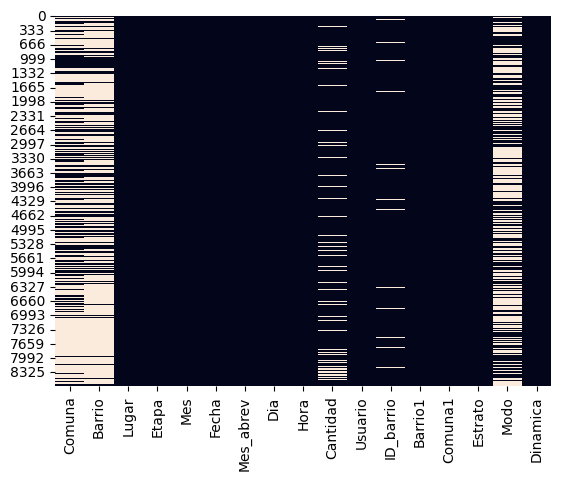

In [20]:

sns.heatmap(df1.isnull(), cbar= False)
plt.show()

### Eliminación de columnas

In [21]:
df1['Cantidad'].value_counts()


Cantidad
0             5423
5.000.000      132
4.000.000      102
3.000.000       78
2.000.000       68
              ... 
12.200.000       1
3.620.000        1
18.960.003       1
538.136          1
2.706.000        1
Name: count, Length: 578, dtype: int64

In [22]:

df1_1 = df1.drop(['Comuna', 'Barrio', 'Cantidad','Mes_abrev','Dinamica'], axis=1)



Se eliminaron las columnas 'Comuna' y 'Barrio' debido a la gran cantidad de datos faltantes, además de que ya se cuenta con las variables 'Comuna 1' y 'Barrio 1', que contienen la misma información sin registros ausentes. Adicionalmente, se eliminó la variable 'Cantidad', ya que su significado no está claro y la mayoría de sus valores son ceros, la variable 'Dinamica', por que el data set ya se conoce que es solo de hurtos, y la variable 'Mes_abrev' ya que contiene los mismos datos que la columna 'Mes'.

### Imputación de datos 
La variable 'modo' presenta una cantidad significativa de datos faltantes, por lo que se decidió imputar los valores preservando las proporciones originales, con el único propósito de cumplir con uno de los requisitos del proyecto. Dado que los datos faltantes superan la mitad del total, esta imputación solo se realizó para cumplir dicho requisito. Sin embargo, para el desarrollo regular del proyecto, se optó por eliminar las filas correspondientes a los datos faltantes.

In [23]:
#Frecuencia absoluta de cada categoria
frecuencia= df1_1['Modo'].value_counts()

#Proporción de cada categoría
proporcion = df1_1['Modo'].value_counts(normalize=True)

resultado = pd.DataFrame({'Frecuencia': frecuencia, 'Proporción': proporcion})
print(resultado)

                  Frecuencia  Proporción
Modo                                    
ARMA DE FUEGO           2463    0.677766
ARMA BLANCA              877    0.241332
SIN ARMA                 237    0.065217
ARMA CONTUNDENTE          29    0.007980
SUSTANCIA TÓXICA          28    0.007705


In [24]:
total_datos= len(df1_1['Modo'])
datos_imputar = []

for i in proporcion:
    operacion= round((i * total_datos),0)  #Multiplicar cada proporción por el total de datos
    datos_imputar.append(operacion)

resta= datos_imputar[0] -1
datos_imputar[0] = resta
print(f"La cantidad total que debe disponer cada categoria es de: {datos_imputar}")



datos_imputar_2= []
for i in range(len(datos_imputar)):
    operacion = datos_imputar[i] - frecuencia[i]
    datos_imputar_2.append(operacion)

datos_imputar_2 = [int(x) for x in datos_imputar_2]
print(f"La cantidad de datos a imputar por cada categoria es de: {datos_imputar_2}")

La cantidad total que debe disponer cada categoria es de: [5856.0, 2085.0, 564.0, 69.0, 67.0]
La cantidad de datos a imputar por cada categoria es de: [3393, 1208, 327, 40, 39]


C:\Users\solan\AppData\Local\Temp\ipykernel_34628\1384159433.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  operacion = datos_imputar[i] - frecuencia[i]


In [25]:
#verificar que valores faltantes correspondan a los calculados por cada categoria
nulos_modo = df1_1['Modo'].isna().sum()
print(nulos_modo)
sum(datos_imputar_2)

5007


5007

In [28]:
categoria = ['ARMA DE FUEGO', 'ARMA BLANCA', 'SIN ARMA', 'ARMA CONTUNDENTE', 'SUSTANCIA TÓXICA']
datos_imputar_2 = [3393, 1208, 327, 40, 39]  # Cantidad de imputaciones deseadas por categoría

# Crear la lista de imputación
lista_imputacion = []
for cat, freq in zip(categoria, datos_imputar_2):
    lista_imputacion.extend([cat] * freq)

# Obtener la columna específica por índice
columna_a_imputar = df1_1.iloc[:, 8]

# Obtener los índices de los valores NaN en la columna seleccionada
indices_nan = columna_a_imputar[columna_a_imputar.isna()].index

# Mezclar la lista de imputación para asegurar aleatoriedad
np.random.shuffle(lista_imputacion)

# Imputar los valores en los índices correspondientes en la columna seleccionada
if len(indices_nan) == len(lista_imputacion):
    df1_1.iloc[indices_nan, 12] = lista_imputacion

In [29]:
df1_1.head()

,Lugar,Etapa,Mes,Fecha,Dia,Hora,Usuario,ID_barrio,Barrio1,Comuna1,Estrato,Modo
0,VIA PUBLICA,EJECUCIÓN DE PENAS,enero,2020-01-01,miércoles,17:45:00,PLOZADA,1403.0,Manuela Beltran,14,1,SIN ARMA
1,SIN INFORMACION,INDAGACIÓN,enero,2020-01-01,miércoles,08:30:00,PONAL_WS,1988.0,Cañaveralejo - Seguros Patria,19,5,ARMA BLANCA
2,DOMICILIO,INDAGACIÓN,enero,2020-01-01,miércoles,02:00:00,CPANTOJAS1,1599.0,El Morichal,15,2,NaN
3,DOMICILIO,INDAGACIÓN,enero,2020-01-01,miércoles,06:35:00,JVILLARREALM1,703.0,Alfonso Lopez III,7,3,NaN
4,VIA PUBLICA,INDAGACIÓN,enero,2020-01-02,jueves,09:30:00,JVILLARREALM1,2008.0,Pueblo Joven,20,1,ARMA DE FUEGO


In [30]:
df1_1['Modo'].value_counts()

Modo
ARMA DE FUEGO       2463
ARMA BLANCA          877
SIN ARMA             237
ARMA CONTUNDENTE      29
SUSTANCIA TÓXICA      28
Name: count, dtype: int64

In [31]:
df1_1 = df1_1.drop(['Modo'], axis=1)

In [32]:
df1_1.head()

,Lugar,Etapa,Mes,Fecha,Dia,Hora,Usuario,ID_barrio,Barrio1,Comuna1,Estrato
0,VIA PUBLICA,EJECUCIÓN DE PENAS,enero,2020-01-01,miércoles,17:45:00,PLOZADA,1403.0,Manuela Beltran,14,1
1,SIN INFORMACION,INDAGACIÓN,enero,2020-01-01,miércoles,08:30:00,PONAL_WS,1988.0,Cañaveralejo - Seguros Patria,19,5
2,DOMICILIO,INDAGACIÓN,enero,2020-01-01,miércoles,02:00:00,CPANTOJAS1,1599.0,El Morichal,15,2
3,DOMICILIO,INDAGACIÓN,enero,2020-01-01,miércoles,06:35:00,JVILLARREALM1,703.0,Alfonso Lopez III,7,3
4,VIA PUBLICA,INDAGACIÓN,enero,2020-01-02,jueves,09:30:00,JVILLARREALM1,2008.0,Pueblo Joven,20,1


In [33]:
#Verificar si la cantidad de categorias de "Rural" coincide con la cantidad de faltantes en 'ID_barrio
rurales= df1_1['Barrio1'][df1_1['Barrio1'] == 'Rural'].count()
nulos_id_barrio= df1_1['ID_barrio'].isna().sum()
print(rurales)
print(nulos_id_barrio)

302
302


In [37]:
#Verificar valores maximo y minimo de 'ID_barrio'
min_id_barrio = df1_1['ID_barrio'].min()
max_id_barrio = df1_1['ID_barrio'].max()
print(min_id_barrio)
print(max_id_barrio)

101.0
2299.0


In [39]:
df1_1['ID_barrio']= df1_1['ID_barrio'].replace(np.nan, 3000)
df1_1['Comuna1']= df1_1['Comuna1'].replace('Rural', 30)

In [40]:
df1_1.head()

,Lugar,Etapa,Mes,Fecha,Dia,Hora,Usuario,ID_barrio,Barrio1,Comuna1,Estrato
0,VIA PUBLICA,EJECUCIÓN DE PENAS,enero,2020-01-01,miércoles,17:45:00,PLOZADA,1403.0,Manuela Beltran,14,1
1,SIN INFORMACION,INDAGACIÓN,enero,2020-01-01,miércoles,08:30:00,PONAL_WS,1988.0,Cañaveralejo - Seguros Patria,19,5
2,DOMICILIO,INDAGACIÓN,enero,2020-01-01,miércoles,02:00:00,CPANTOJAS1,1599.0,El Morichal,15,2
3,DOMICILIO,INDAGACIÓN,enero,2020-01-01,miércoles,06:35:00,JVILLARREALM1,703.0,Alfonso Lopez III,7,3
4,VIA PUBLICA,INDAGACIÓN,enero,2020-01-02,jueves,09:30:00,JVILLARREALM1,2008.0,Pueblo Joven,20,1


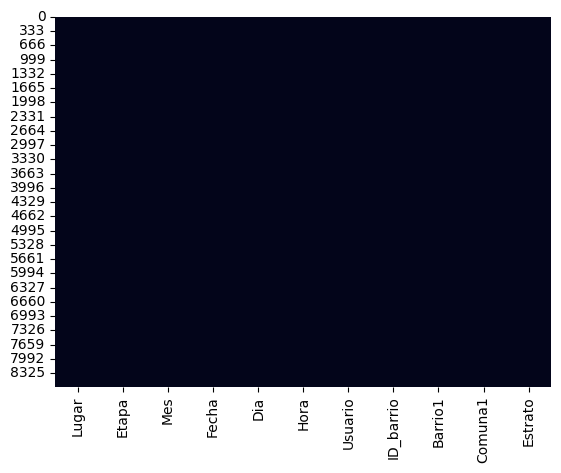

In [41]:
sns.heatmap(df1_1.isnull(), cbar= False)
plt.show()

### Cambio de formato de la Hora 

In [42]:
# Convertir la columna 'hora' a tipo datetime
df1_1['Hora1'] = pd.to_datetime(df1_1['Hora'], format='%H:%M:%S')

# Redondear las horas al entero más cercano
df1_1['hora_r'] = df1_1['Hora1'].dt.round('H').dt.hour

## 5. Visualización de Datos

### Frecuencia de delitos en las diferentes columnas en función del mes

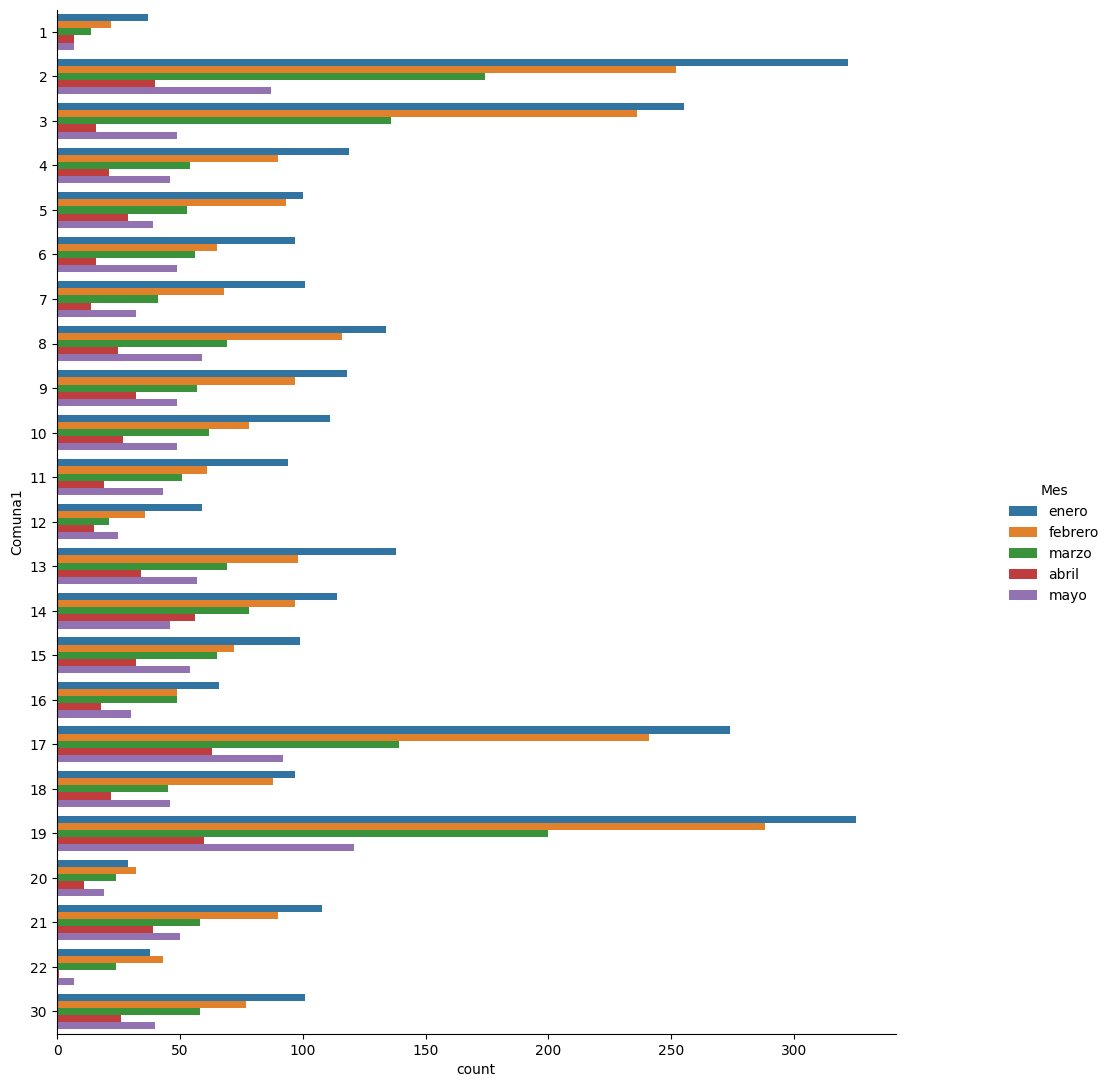

In [43]:
#Frecuencia de delitos en las comunas en funcion del mes
grafico1= sns.catplot(data = df1_1, y="Comuna1", hue="Mes", kind="count")
grafico1.fig.set_size_inches(12, 12)

### Frecuencia de los delitos en función del mes 

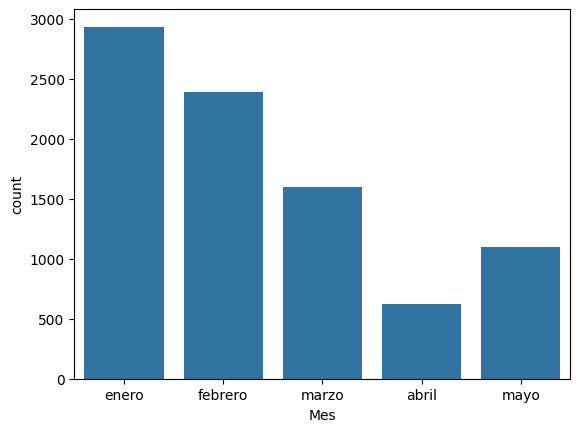

In [44]:

meses_ordenados = ['enero', 'febrero', 'marzo', 'abril', 'mayo']
df_grouped = df1_1.groupby('Mes').size().reset_index(name='count')
grafico2 = sns.barplot(data=df_grouped, x='Mes', y='count', order=meses_ordenados)

plt.show()

Se puede apreciar que las comunas donde se reporta un mayor número de hurtos son la Comuna 2, la Comuna 3, la Comuna 17 y la Comuna 19, por lo que se presenta una incidencia significativamente más alta de este tipo de delitos en comparación con otras zonas de la ciudad, lo que sugiere que estas comunas podrían ser puntos críticos donde se concentra una mayor actividad delictiva.

En cuanto a la temporalidad de los hurtos, el mes en el que se registra la menor cantidad de delitos es abril, lo que indica una reducción notable en la actividad delictiva durante este período, sin embargo, los meses de enero y febrero destacan como los momentos del año en los que se cometen más hurtos. Esto podría estar vinculado a dinámicas estacionales, como el aumento del flujo de personas y de dinero debido a festividades y vacaciones, lo que puede generar un ambiente propicio para la ocurrencia de delitos. 

### Frecuencia de los delitos en función del día

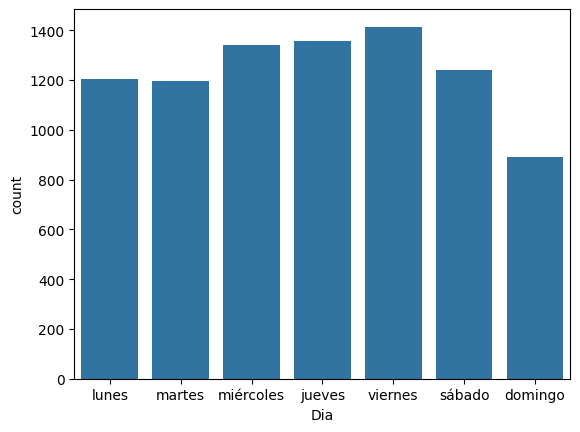

In [45]:

dias_ordenados = ['lunes', 'martes', 'miércoles', 'jueves', 'viernes','sábado','domingo']
df_grouped = df1_1.groupby('Dia').size().reset_index(name='count')
grafico2 = sns.barplot(data=df_grouped, x='Dia', y='count', order=dias_ordenados)

plt.show()

La gráfica muestra que los hurtos ocurren con mayor frecuencia hacia el final de la semana laboral, alcanzando su punto máximo los días viernes, seguido de cerca por jueves y miércoles, con más de 1,300 incidentes reportados en estos días. En contraste, el domingo es el día con la menor cantidad de hurtos, con menos de 1,000 reportes, lo que sugiere una disminución significativa de la actividad delictiva. Los días lunes, martes y miércoles presentan una actividad delictiva media, con cifras cercanas a los 1,200-1,300 hurtos. El sábado, aunque registra menos incidentes que el resto de la semana, aún supera al domingo en número de hurtos. Estos patrones podrían estar relacionados con el aumento de la actividad económica y social hacia el final de la semana, mientras que el domingo, al haber menos movimiento en la ciudad, presenta menos oportunidades para que se cometan delitos.

### Frecuencia de los delitos en función de intervalos de hora

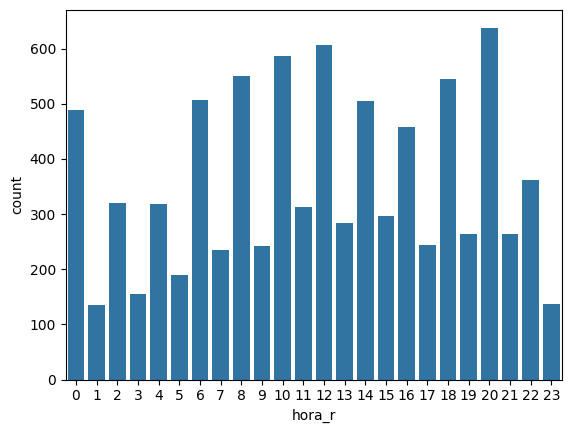

In [46]:
df_grouped = df1_1.groupby('hora_r').size().reset_index(name='count')
grafico2 = sns.barplot(data=df_grouped, x='hora_r', y='count')

plt.show()

La gráfica muestra la distribución de hurtos a lo largo de las 24 horas del día, con un comportamiento marcado en ciertos momentos. Se observa un primer pico significativo a la medianoche, con casi 500 eventos registrados, lo que indica una alta actividad delictiva en esa franja nocturna.

Durante las horas de la madrugada, entre la 1 y las 4 de la mañana, los hurtos disminuyen de manera considerable. Sin embargo, a partir de las 5 de la mañana, comienza un aumento sostenido en la cantidad de hurtos, que se intensifica a lo largo de las primeras horas del día. Este incremento culmina entre las 7 y las 11 horas, con un pico notable alrededor de las 10, lo que sugiere que la mañana es una de las franjas horarias más críticas en cuanto a actividad delictiva.

En el mediodía y la tarde, entre las 12 y las 19 horas, los hurtos se mantienen elevados, con algunas fluctuaciones. A las 13 horas, hay una breve disminución, pero rápidamente los hurtos vuelven a subir, alcanzando otro pico importante alrededor de las 19 y 20 horas, momentos en los que nuevamente se registran más de 500 incidentes.

Finalmente, a partir de las 21 horas, la actividad delictiva comienza a decaer, siendo particularmente baja a las 23 horas, justo antes de volver a aumentar en la medianoche.

### Barrios con mas registros de hurtos filtrado por las comunas donde mas se presentan los delitos 


C:\Users\solan\AppData\Local\Temp\ipykernel_34628\976119112.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\solan\AppData\Local\Temp\ipykernel_34628\976119112.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\solan\AppData\Local\Temp\ipykernel_34628\976119112.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\solan\AppData\Local\Temp\ipykernel_34628\976119112.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\solan\AppData\Local\Temp\ipykernel_34628\976119112.py:18: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.tight_layout()
c:\Users\solan\anaconda3\Lib\site-packages\IPython\core\pylabtools.

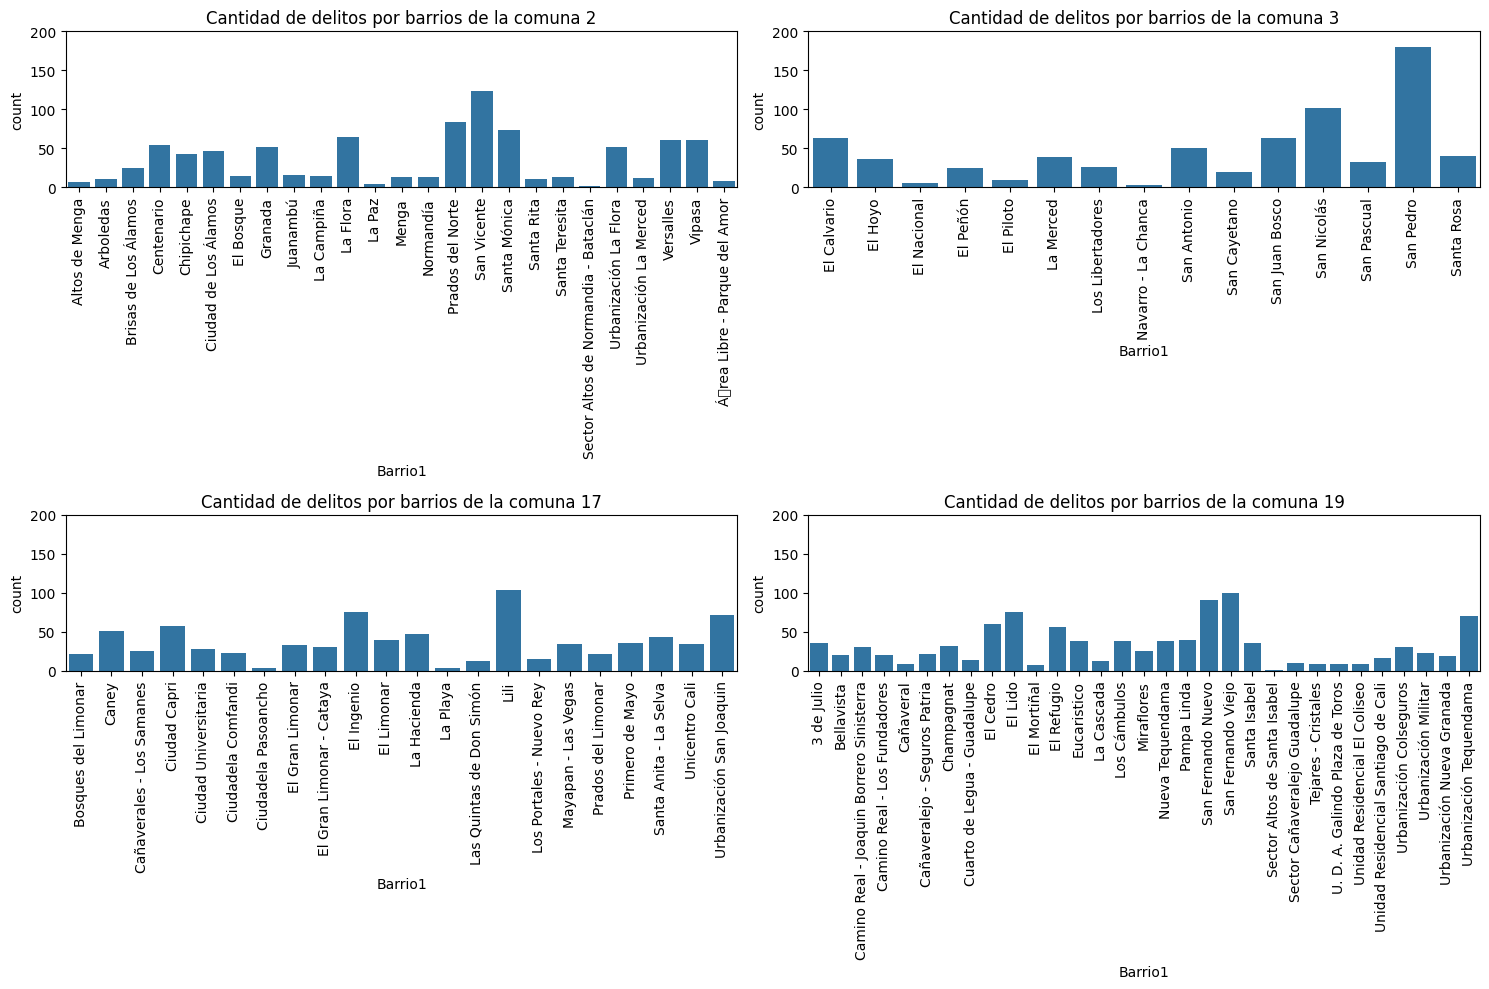

In [47]:
def graficar_comuna(ax, comuna_num, df):
    comuna = df['Comuna1'] == comuna_num
    df_grouped = df[comuna].groupby('Barrio1').size().reset_index(name='count')
    sns.barplot(data=df_grouped, x='Barrio1', y='count', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f'Cantidad de delitos por barrios de la comuna {comuna_num}')
    ax.set_ylim(0, 200)

# Crear una figura con 4 subgráficos
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Generar gráficos para las comunas 2, 3, 17 y 19
comunas = [2, 3, 17, 19]
for ax, comuna_num in zip(axs.flatten(), comunas):
    graficar_comuna(ax, comuna_num, df1_1)

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()
plt.show()

Las gráficas presentan la cantidad de hurtos cometidos en diferentes barrios dentro de las comunas 2, 3, 17 y 19 donde se puede apreciar lo siguiente:

- **Comuna 2**: 
   En esta comuna, los barrios con mayor cantidad de hurtos son Prados del Norte, San Vicente y Santa Mónica, cada uno registrando más de 100 hurtos. Otros barrios como La Flora, Versalles y Vípasa también muestran una actividad delictiva relevante, aunque menor.

- **Comuna 3**: 
   El barrio con mayor cantidad de hurtos es San Pedro, superando ampliamente a otros barrios. El Nacional muestra el nivel más bajo de delitos.

- **Comuna 17**: 
    En esta comuna, los hurtos están más concentrados en Lili. También destacan barrios como Urbanización San Joaquín y el ingenio,, aunque en menor medida.

- **Comuna 19**: 
   San Fernando Viejo y San Fernando Nuevo son los barrios con más hurtos reportados, ambos superando los 100 casos. Otros barrios como Urbanización Tequendama, El Cedro y El Lido también muestran una considerable actividad delictiva.

Cada comuna tiene uno o dos barrios donde se concentran la mayor cantidad de hurtos, destacando especialmente barrios como San Vicente en la Comuna 2, San Pedro en la Comuna 3, Lili en la Comuna 17, y San Fernando Viejo en la Comuna 19. Estos patrones indican áreas específicas dentro de cada comuna que requieren mayor atención en términos de seguridad y prevención del delito.

In [48]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install contextily

In [70]:
df1_1.rename(columns={'Comuna1': 'comuna'}, inplace=True)

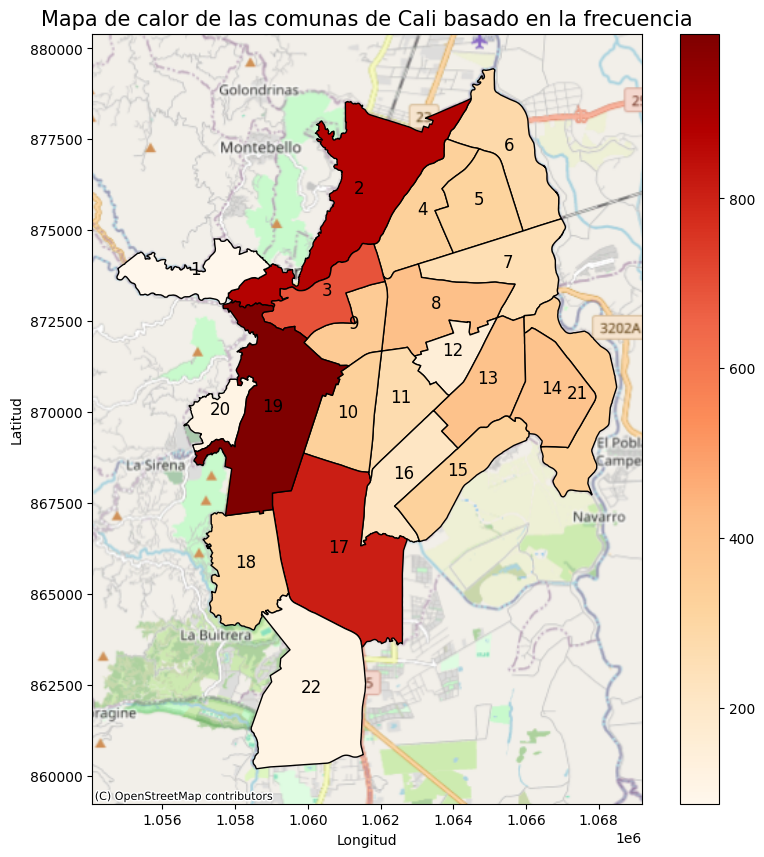

In [76]:

# Contar la cantidad de veces que se repite cada comuna
comuna_counts = df1_1['comuna'].value_counts().reset_index()
comuna_counts.columns = ['comuna', 'count']

# Cargar el shapefile de las comunas de Cali en un GeoDataFrame
gdf_comunas = gpd.read_file('mc_comunas.shp')

# Unir los datos de conteo de comunas con las geometrías de las comunas
gdf_comunas = gdf_comunas.merge(comuna_counts, on='comuna', how='left')

# Crear el mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Graficar las comunas, usando la columna 'count' para definir el color
gdf_comunas.plot(column='count', ax=ax, legend=True, cmap='OrRd', edgecolor='black')

# Añadir el número de cada comuna en el centroide de cada polígono
for idx, row in gdf_comunas.iterrows():
    # Obtener el centroide de cada polígono de la comuna
    centroid = row['geometry'].centroid
    # Añadir el número de la comuna en el centroide
    plt.text(centroid.x, centroid.y, str(int(row['comuna'])), fontsize=12, ha='center', color='black')

# Añadir un mapa base 
try:
    ctx.add_basemap(ax, crs=gdf_comunas.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
except Exception as e:
    print(f"Error al cargar el mapa base: {e}")


# Añadir título y etiquetas
plt.title('Mapa de calor de las comunas de Cali basado en la frecuencia', fontsize=15)
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el gráfico
plt.show()

El mapa ilustra la distribución de las comunas de Cali utilizando un esquema de colores que representa la incidencia de hurtos en cada una. Los tonos más oscuros reflejan una mayor frecuencia de robos, mientras que los colores más claros indican una menor cantidad de casos.

De manera evidente, las comunas más afectadas por los hurtos son la 19, 17, 2 y 3, siendo la comuna 19 la que registra el mayor número de incidentes en toda la ciudad. Esta concentración de hurtos en dichas comunas puede estar vinculada a su alto grado de urbanización y actividad económica, factores que incrementan la exposición al delito.

En contraste, las comunas con tonos más claros, como la 1, 20 y 22, muestran una menor incidencia de hurtos. En el caso de la comuna 1 y la comuna 20, que corresponden a estratos socioeconómicos más bajos, es probable que se presenten otros tipos de delitos, ya que, debido a los bajos recursos, los hurtos no son tan frecuentes. Por otro lado, la comuna 22, comprendida por barrios como Ciudad Jardín y Pance, se caracteriza por ser un área habitada por políticos, empresarios y personas de alto poder adquisitivo, lo que la convierte en una de las zonas más exclusivas y costosas del país, con una menor incidencia de delitos de esta naturaleza.

In [78]:
df1_1.to_csv('delitos_clean.csv')